 Mean Absolute Error (MAE): 12.45
 R² Score: -0.30


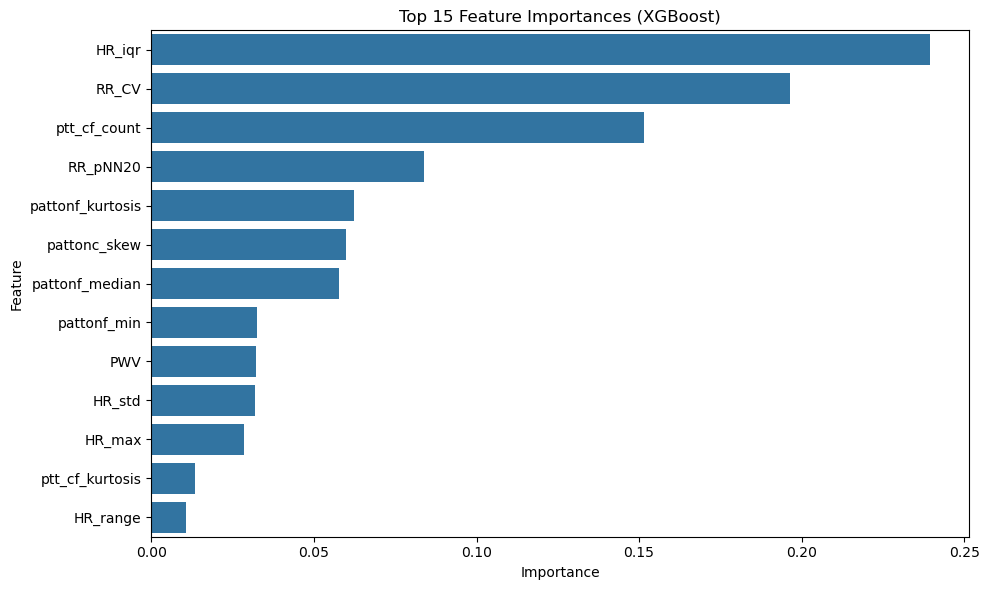

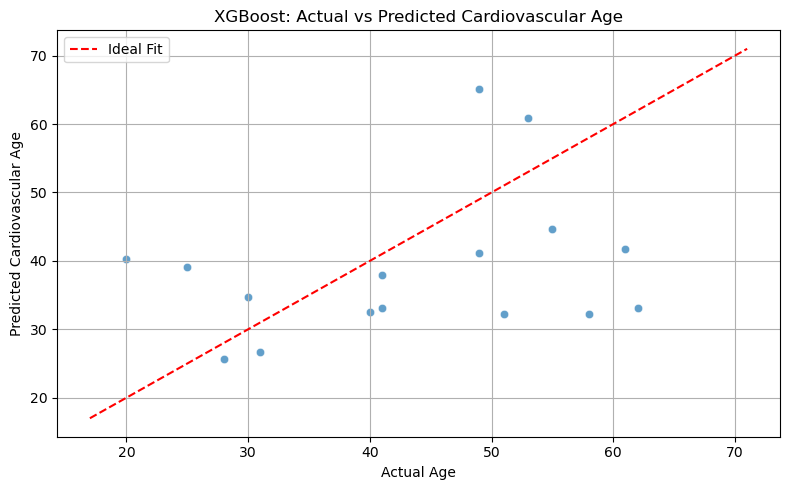

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

#Load the cleaned tonometry dataset
df = pd.read_csv("cleaned_tonometry_dataset.csv")  # Update path if needed

#Separate features and target
X = df.drop(columns=["Age"])
y = df["Age"]

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Train XGBoost model
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)
xgb_model.fit(X_train, y_train)

#Predict and evaluate
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" R² Score: {r2:.2f}")

#Feature importance plot
feat_imp_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df.head(15))
plt.title("Top 15 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

#Actual vs Predicted plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Age")
plt.ylabel("Predicted Cardiovascular Age")
plt.title("XGBoost: Actual vs Predicted Cardiovascular Age")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
